In [3]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn
import matplotlib
import scipy as sc

from scipy.integrate import quad # импорт интеграла
from numpy import exp
from scipy.constants import k,N_A

#%matplotlib qt5 #interactive plotting in separate window %matplotlib qt  
#%matplotlib notebook #interactive charts inside notebooks, matplotlib 1.4+

%matplotlib inline 


In [4]:

capacity_exp = pd.read_csv('Heat_capacity_cu12as4s13_exp.txt', '\t', names = ['temperature','heat_capacity']) # импорт экспериментальных данных

fig = pp.figure()



<Figure size 432x288 with 0 Axes>

      temperature  heat_capacity
3395        349.5    7690.356418
3396        349.6    7690.848029
3397        349.7    7691.339276
3398        349.8    7691.830159
3399        349.9    7692.320679


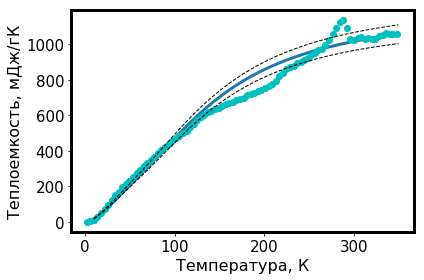

In [20]:
# Моделирование теплоемкости для теннантита Cu12As4S13
fig = pp.figure()
fig.clear()


y = 623 #temperature Debay
te2 = 124
te3 = 220
te4 = 220
te1 = 41
def capasity(t):
    ans, err = quad(lambda x1: exp(x1)*x1**4/((exp(x1)-1)**2), 0, y/t)    
    return  (9)*k*N_A*260*((t/y)**3)*ans +(0.2)*k*N_A*260*exp(te1/t)*(te1/t)**2/((exp(te1/t)-1)**2) + (0.5)*k*N_A*260*exp(te2/t)*(te2/t)**2/((exp(te2/t)-1)**2) + (0.30)*k*N_A*260*exp(te3/t)*(te3/t)**2/((exp(te3/t)-1)**2)# + (0.620)*k*N_A*260*exp(te4/t)*(te4/t)**2/((exp(te4/t)-1)**2)

    
heatcapacity = []
arr = np.arange(10,350,0.1)
for i in arr:
    heatcapacity.append([i,capasity(i)])

    
heatcapacity #.reverse()
labels = ['temperature','heat_capacity']
heatcapacity_ther = pd.DataFrame.from_records(heatcapacity, columns = labels)
print heatcapacity_ther.tail(5) 
#print capacity_exp.tail(5)

#s = heatcapacity_ther['heat_capacity']
const = heatcapacity_ther.iloc[3398, 1] # сохранение максимального значения теплоемкости
# перенормировка
heatcapacity_ther['heat_capacity'] = heatcapacity_ther['heat_capacity']*1058/const


pp.plot(heatcapacity_ther['temperature'], heatcapacity_ther['heat_capacity'], linewidth=3)
pp.plot(capacity_exp['temperature'],capacity_exp['heat_capacity'], 'co')


pp.plot(heatcapacity_ther['temperature'], 0.95*heatcapacity_ther['heat_capacity'], '--', color='k', linewidth=1)
pp.plot(heatcapacity_ther['temperature'], 1.05*heatcapacity_ther['heat_capacity'], '--', color='k', linewidth=1)




pp.xlabel(u'Температура, К', fontsize=16)    # обозначение оси абсцисс
pp.ylabel(u'Теплоемкость, мДж/гК', fontsize=16)    # обозначение оси ординат

pp.rc('axes', linewidth=3) 
pp.tick_params(axis='both', labelsize = 15) 

pp.tight_layout()
pp.savefig('Heat_capacity_cu12as4s13.png', dpi = 600)

pp.show()

heatcapacity#.reverse()
with open("Heat_capacity_cu12as4s13.txt", 'w') as f:
    np.savetxt(f,heatcapacity)

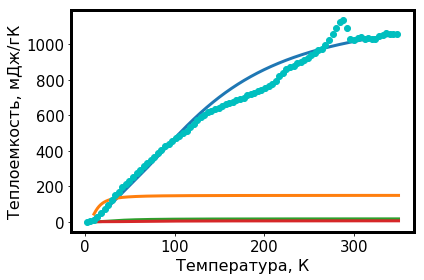

In [23]:
fig = pp.figure()
fig.clear()
def einstain(t, x):
    return (k*N_A*260*exp(x/t)*(te1/t)**2/((exp(x/t)-1)**2)) *(0.5) 
    
heatcapacity = []
arr = np.arange(10,350,0.1)
for i in arr:
    heatcapacity.append([i,capasity(i)])
    
te2 = 124
te3 = 220
te4 = 220
te1 = 41


einastain1 = []
for i in arr:
    einastain1.append([i,einstain(i,te1),einstain(i,te2),einstain(i,te3)])

labels1 = ['temperature','te1','te2','te3']
einastain2 = pd.DataFrame.from_records(einastain1, columns = labels1)

pp.plot(heatcapacity_ther['temperature'], heatcapacity_ther['heat_capacity'], linewidth=3)
pp.plot(einastain2['temperature'], einastain2['te1'] * 1058/const, linewidth=3)
pp.plot(einastain2['temperature'], einastain2['te2'] * 1058/const, linewidth=3)
pp.plot(einastain2['temperature'], einastain2['te3'] * 1058/const, linewidth=3)
pp.plot(capacity_exp['temperature'],capacity_exp['heat_capacity'], 'co')
#pp.tick_params(axis='both', which='both',length =16, labelsize=16, width =16)


pp.xlabel(u'Температура, К', fontsize=16)    # обозначение оси абсцисс
pp.ylabel(u'Теплоемкость, мДж/гК', fontsize=16)    # обозначение оси ординат

pp.rc('axes', linewidth=3) 
pp.tick_params(axis='both', labelsize = 15)

pp.tight_layout()
pp.savefig('Heat_capacity_cu12as4s13_with_eins.png', dpi = 600)

pp.show()

In [21]:
# Моделирование теплоемкости для Мгриита Cu12As4S13 
capacity_exp_mg = pd.read_csv('Heat_capacity_cu3asse3_exp.txt', '\t', names = ['temperature','heat_capacity']) # импорт экспериментальных данных


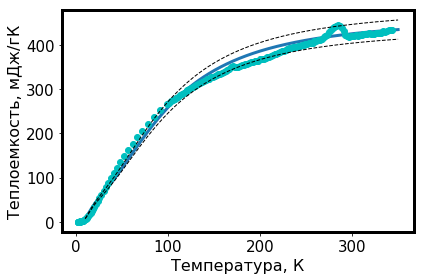

In [23]:
# Моделирование теплоемкости для Мгриита Cu12As4S13 
fig = pp.figure()
fig.clear()

y = 500 #temperature Debay
te1 = 288
te2 = 186
te3 = 60
def capasity(t):
    ans, err = quad(lambda x1: exp(x1)*x1**4/((exp(x1)-1)**2), 0, y/t)    
    return (9)*k*N_A*260*((t/y)**3)*ans + (3/3)*k*N_A*260*exp(te1/t)*(te1/t)**2/((exp(te1/t)-1)**2) + (3/3)*k*N_A*260*exp(te2/t)*(te2/t)**2/((exp(te2/t)-1)**2) + (3/3)*k*N_A*260*exp(te3/t)*(te3/t)**2/((exp(te3/t)-1)**2)


heatcapacity = []
arr = np.arange(10,350,0.1)
for i in arr:
    heatcapacity.append([i,capasity(i)])

    
heatcapacity #.reverse()
labels = ['temperature','heat_capacity']
heatcapacity_ther = pd.DataFrame.from_records(heatcapacity, columns = labels)
#print heatcapacity_ther.tail(5) 
#print capacity_exp_mg.tail(5)

#s = heatcapacity_ther['heat_capacity']
const = heatcapacity_ther.iloc[3395, 1] # сохранение максимального значения теплоемкости
# перенормировка
heatcapacity_ther['heat_capacity'] = heatcapacity_ther['heat_capacity']*435/const


pp.plot(heatcapacity_ther['temperature'], heatcapacity_ther['heat_capacity'], linewidth=3) 
pp.plot(capacity_exp_mg['temperature'],capacity_exp_mg['heat_capacity'], 'co') 

pp.plot(heatcapacity_ther['temperature'], 0.95*heatcapacity_ther['heat_capacity'], '--', color='k', linewidth=1)
pp.plot(heatcapacity_ther['temperature'], 1.05*heatcapacity_ther['heat_capacity'], '--', color='k', linewidth=1)


pp.xlabel(u'Температура, К')    # обозначение оси абсцисс
pp.ylabel(u'Теплоемкость, мДж/гК')    # обозначение оси ординат


pp.xlabel(u'Температура, К', fontsize=16)    # обозначение оси абсцисс
pp.ylabel(u'Теплоемкость, мДж/гК', fontsize=16)    # обозначение оси ординат

pp.rc('axes', linewidth=3) 
pp.tick_params(axis='both', labelsize = 15)

pp.tight_layout()
pp.savefig('Heat_capacity_cu3asse3.png', dpi = 600)

pp.show()

heatcapacity#.reverse()
with open("Heat_capacity_cu3asse3.txt", 'w') as f:
    np.savetxt(f,heatcapacity)

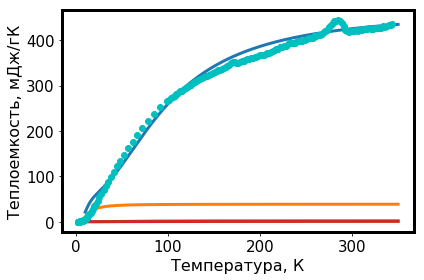

In [18]:
fig = pp.figure()
fig.clear()
def einstain(t, x):
    return (k*N_A*260*exp(x/t)*(te1/t)**2/((exp(x/t)-1)**2)) *(0.5) 
    
heatcapacity = []
arr = np.arange(10,350,0.1)
for i in arr:
    heatcapacity.append([i,capasity(i)])
    
te2 = 186
te3 = 288
te1 = 42



einastain1 = []
for i in arr:
    einastain1.append([i,einstain(i,te1),einstain(i,te2),einstain(i,te3)])

labels1 = ['temperature','te1','te2','te3']
einastain2 = pd.DataFrame.from_records(einastain1, columns = labels1)

pp.plot(heatcapacity_ther['temperature'], heatcapacity_ther['heat_capacity'], linewidth=3)
pp.plot(einastain2['temperature'], einastain2['te1'] * 435/const, linewidth=3)
pp.plot(einastain2['temperature'], einastain2['te2'] * 435/const, linewidth=3)
pp.plot(einastain2['temperature'], einastain2['te3'] * 435/const, linewidth=3)
pp.plot(capacity_exp_mg['temperature'],capacity_exp_mg['heat_capacity'], 'co')
#pp.tick_params(axis='both', which='both',length =16, labelsize=16, width =16)


pp.xlabel(u'Температура, К', fontsize=16)    # обозначение оси абсцисс
pp.ylabel(u'Теплоемкость, мДж/гК', fontsize=16)    # обозначение оси ординат

pp.rc('axes', linewidth=3) 
pp.tick_params(axis='both', labelsize = 15)

pp.tight_layout()
pp.savefig('Heat_capacity_cu3asse3_with_eins.png', dpi = 600)

pp.show()